#### Introduction

In this lesson, the `StorageFactory` contract will be upgraded to **keep track* of all deployed `SimpleStorage` contracts. This will allow us also to *interact* with each deployed contract individually.

#### Storing the deployed contracts

In the current `StorageFactory` version, every time `createSimpleStorageContract` is called, a new `SimpleStorage` contract is deployed and **overridden** inside the variable `SimpleStorage`. Past deployments are not being tracked down.

To solve this issue we can create a variable `listOfSimpleStorageContracts`, which is an array of `SimpleStorage` contracts. In this way, whenever a contract is created, it gets added to a dynamic array.

In [ ]:
SimpleStorage[] public listOfSimpleStorageContracts;

We can then modify the function `createSimpleStorageContract`, pushing the newly deployed contract to this variable.

In [ ]:
function createSimpleStorageContract() public {
    SimpleStorage simpleStorageContractVariable = new SimpleStorage();
    listOfSimpleStorageContracts.push(simpleStorageContractVariable);
}

In Remix, you can access `listOfSimpleStorageContracts` via the index of type `uint256`, which refers to the **position** of the deployed contract inside the dynamic array.

#### Simple Storage interaction

`StorageFactory` can interact with the deployed contracts by calling their `store` function. To do this we need to create a **function** `sfStore`:

In [ ]:
function sfStore(uint256 _simpleStorageIndex, uint256 _simpleStorageNumber) public {
    // SimpleStorage store function will be called here
}

```
IMPORTANT:
```
* Every time you have to interact with another contract, you need:
1. the contract **address**
2. the contract **ABI (Application Binary Itnerface)**: a standardized way for interacting with the binary versino of a smart contract deployed on the blockchain. It specified the functions, their parameters, and the structure of the data that can be used to interact with the contract. It's generated by the compiler.

```
NOTE:
```
* If you do not have the full ABI available, a function selector will suffice (see later in the course).

If you go to Solidity's compile tab, you will find a button that lets you copy the ABI to the clipboard.

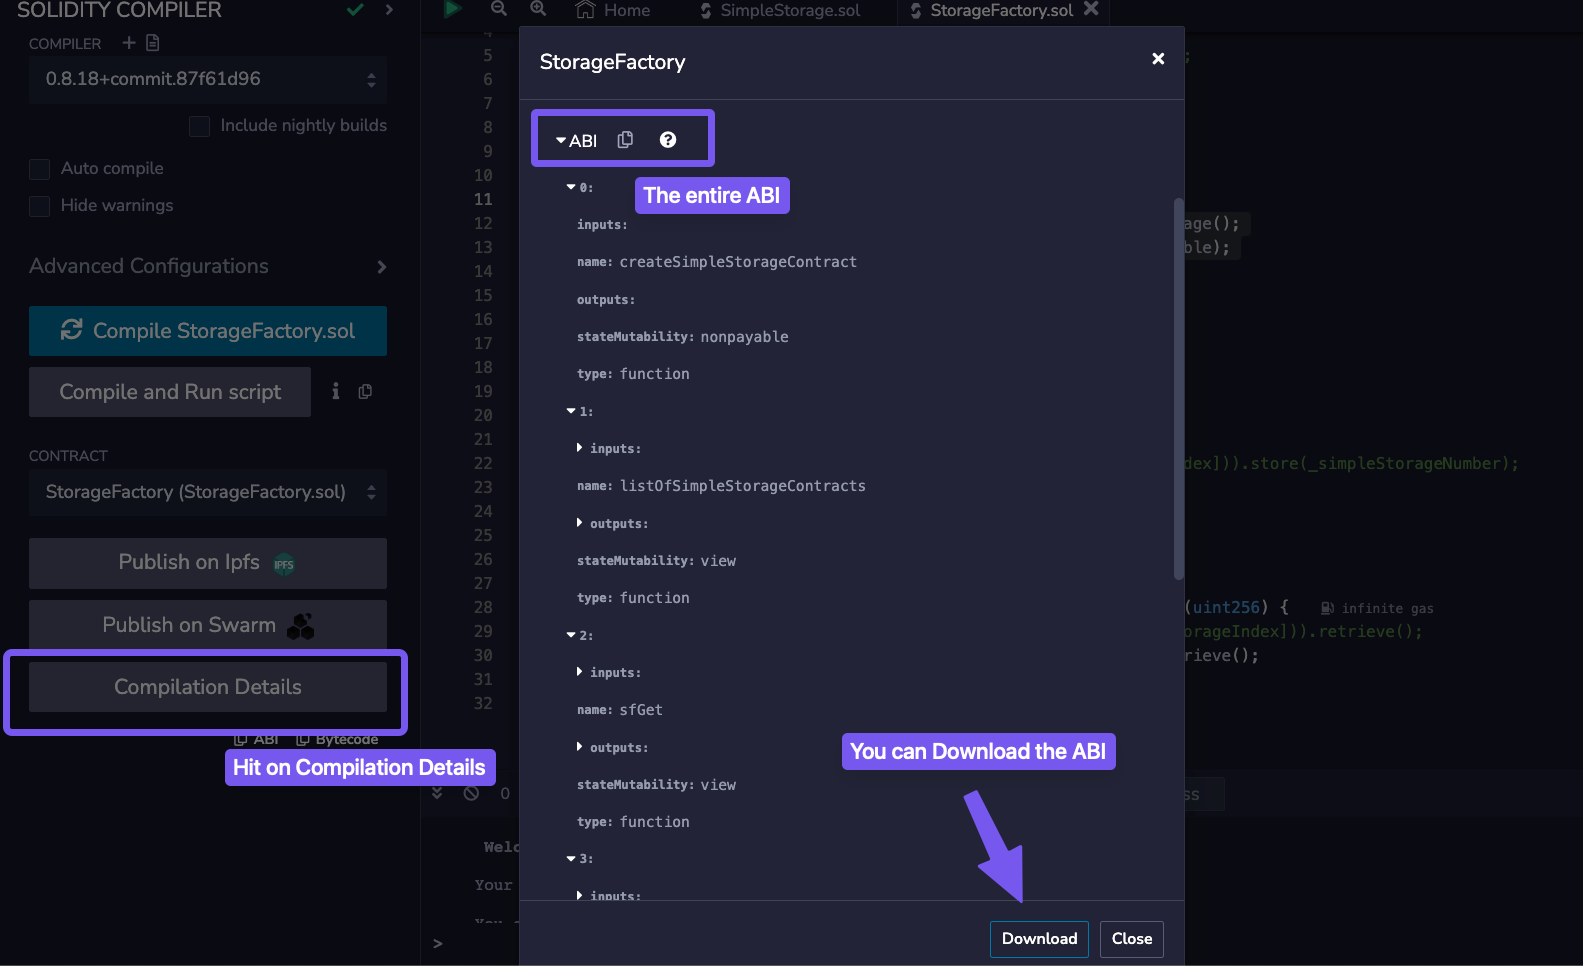

```
NOTE:
```
* In Solidity, it's possible to **type cast** an *address* to a type *contract*

We can now proceed to store a new number on a `SimpleStorage` contract:

In [ ]:
function sfStore(uint256 _simpleStorageIndex, uint256 _simpleStorageNumber) public {
    listOfSimpleStorageContracts[_simpleStorageIndex].store(_simpleStorageNumber);
}

We can then retrieve the stored value with a *get* function:

In [ ]:
function sfGet(uint256 _simpleStorageIndex) public view returns (uint256) {
    // return SimpleStorage(address(simpleStorageArray[_simpleStorageIndex])).retrieve();
    return listOfSimpleStorageContracts[_simpleStorageIndex].retrieve();
}

#### Conclusion

The `StorageFactory` contract was able to create a list of `SimpleStorage` contracts, store a varaible in each of them and read it back.

#### Test yourself

1. What do you need to interact with an external contract?
   * the contract address
   * the contract ABI

2. Deploy 3 instances of the `SimpleStorage` contract through the `StorageFactory`. Then store some numbers via `sfStore` and retrieve all of them via `sfGet`.